In [13]:
import matplotlib.pyplot as plt
import numpy as np
from TimeTagger import *

In [2]:
# Name of the file we want to read. 
# Remember, "Measurement.ttbin" files read all the files in sequence 'Measurement'
file = "C:/Users/HP/Downloads/TimeTags_RaulAir_2024-10-25_172331.1.ttbin"

In [3]:
fr = FileReader(file)
print("All channels available: {}".format(fr.getChannelList()))

print("Has data? ->", fr.hasData())
# Returns: True if more data is available for reading, False if all data has been read from all the files specified in the class constructor.

All channels available: (1, 2)
Has data? -> True


In [4]:
# Now we are going to print all the configuration of the TT-Ultra at the moment of the measurement
config = fr.getConfiguration()

for key, value in config.items():
    print(f"{key}: {value}")

channel number scheme: 2
configure version: 1
current time: 2024-10-25 17:23:31 +0200
devices: [{'FPGA ID': 11493476189726804, 'PCB UID': '00fdf287', 'PCB version': '1.8 (1)', 'minimum software version': '2.10.6', 'model': 'Time Tagger Ultra', 'serial': '2410001ABQ'}]
firmware version: TT-Ultra, FW6, TS 2024-02-09 12:21:10, OK 1.46
fpga link: {'enabled': False}
hardware buffer size: 67108864
inputs: [{'average rising falling': [False, False], 'channel': [1, -1], 'conditional filter filtered': [False, False], 'conditional filter triggers': [False, False], 'deadtime': [2000, 2000], 'delay hardware': [0, 0], 'delay software': [0, 0], 'event divider': [1, 1], 'hardware delay compensation': [333, 333], 'high priority channel': [False, False], 'input hysteresis': 0, 'input impedance high': False, 'input mux': 0, 'normalization': [True, True], 'resolution': 'Standard', 'resolution rms': 42.0, 'trigger level': 0.5}, {'average rising falling': [False, False], 'channel': [2, -2], 'conditional fi

In [5]:
virtual_tagger = createTimeTaggerVirtual()
virtual_tagger.getConfiguration()

{'configure version': 1,
 'current time': '2024-10-28 17:55:35 +0100',
 'hardware configuration': None,
 'measurements': [],
 'replay speed': -1.0,
 'software clock': None,
 'software version': '2.17.4',
 'virtual inputs': []}


Start-Stop measurement is running.

Rate of counts channel 1 (counts/sec) : 8003.999108212611
Total counts channel 1 : 19357524
Rate of counts channel 2 (counts/sec) : 4305.408941877971
Total counts channel 2 : 10412552


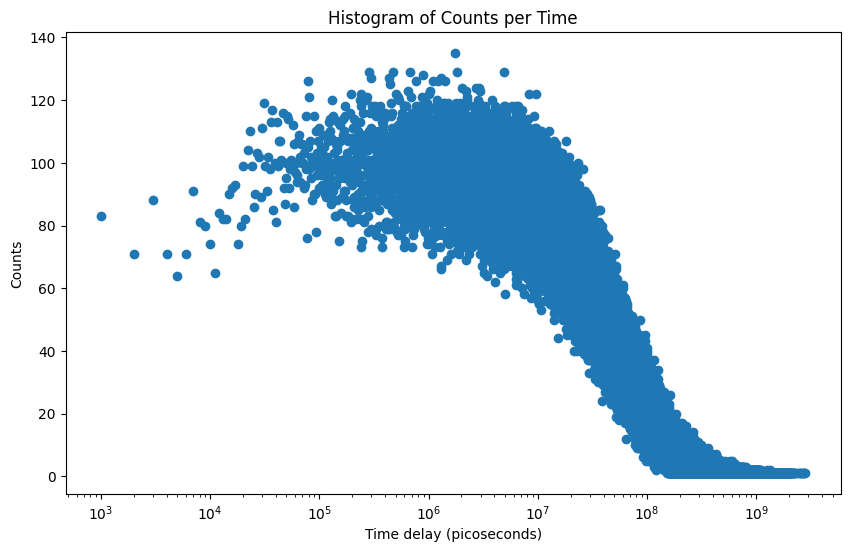

In [16]:
ch1 = 1 # first photon channel for antibunching measurements
ch2 = 2 # second photon channel for antibunching measurements
bw = 1000 # 1 ns

startstop = StartStop(virtual_tagger, ch1, ch2, bw)
cr = Countrate(virtual_tagger, [ch1, ch2])
print("\nStart-Stop measurement is running.\n")


virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
virtual_tagger.replay(file) # collect data until the end (20 sec)
#virtual_tagger.replay(file, duration=10e11) # collect only 1 sec. of data (duration in picoseconds)
virtual_tagger.waitForCompletion()


data = startstop.getData()

print(f"Rate of counts channel {ch1} (counts/sec) : {cr.getData()[0]}")
print(f"Total counts channel {ch1} : {cr.getCountsTotal()[0]}")
print(f"Rate of counts channel {ch2} (counts/sec) : {cr.getData()[1]}")
print(f"Total counts channel {ch2} : {cr.getCountsTotal()[1]}")

# Convert the list of tuples into two separate lists
times, counts = zip(*data)

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar los datos como puntos
plt.scatter(times, counts)  # Utiliza puntos en lugar de líneas

# Configurar etiquetas y título
plt.xlabel('Time delay (picoseconds)')
plt.ylabel('Counts')
plt.xscale('log')  # Cambiar el eje x a escala logarítmica
plt.title('Histogram of Counts per Time')

# Mostrar la gráfica
plt.show()